In [1]:
import HNLGen, LabFrame
import numpy as np
import matplotlib.pyplot as plt
from particle import Particle

In [2]:
mmu = Particle.from_pdgid(13).mass / 1e3
mpi = Particle.from_pdgid(211).mass / 1e3
me = Particle.from_pdgid(11).mass / 1e3

In [10]:
def selection_efficiency(m):
    sw2 = 0.223

    #gL and gR couplings if N decays only via Z-Boson
    #See arXiv:2104.05719 for more variations.
    #If interested in electron-mixing-only, gL changes to 0.5*(1.0 + 2.0*sw2), gR is unchanged
    gLgRTrue = [0.5*(1.0 - 2.0*sw2), sw2]

    EMinT, OACutT = 0.017, 15.0 #Minimum visible energy (17 MeV) and opening angle (15 degrees) for identification
    DetAngUncert = 10.0 #Angular uncertainty for electron tracks

    muBMasses = np.linspace(0.01, m-0.01, 10)

    cutpassfracs, means = [], []
    for mmi in range(len(muBMasses)):
        mNT = muBMasses[mmi]

        Dist0 = HNLGen.RetSampDM([mNT, me, me], [m, me], gLgRTrue, 1, False, True) #Generate sample of events
        LF = LabFrame.LFEvts(Dist0, [mNT, me, me], [m, me])

        LFS = LabFrame.LFSmear(LF, DetAngUncert)
        AnalysisS = LabFrame.LFAnalysis(LFS)

        CutResultsS = LabFrame.CutAnalysis(AnalysisS, EMinT, OACutT)
        EffCuts = CutResultsS[0]

        cutpassfracs.append([mNT, EffCuts])

        PCS = CutResultsS[1]
        if PCS is None:
            continue
        mean = np.average(np.transpose(PCS)[2], weights=np.transpose(PCS)[4])
        means.append([mNT, mean])

    return cutpassfracs, means


In [11]:
cutpass_mu = selection_efficiency(mmu)
cutpass_pi = selection_efficiency(mpi)

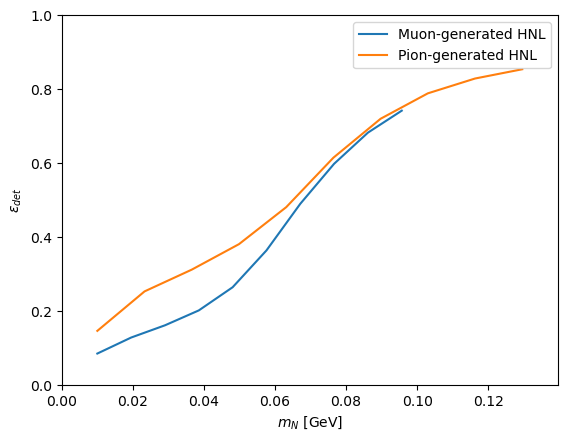

In [12]:
fig, ax  = plt.subplots(1,1)
ax.plot(np.transpose(cutpass_mu[0])[0], np.transpose(cutpass_mu[0])[1], label='Muon-generated HNL')
ax.plot(np.transpose(cutpass_pi[0])[0], np.transpose(cutpass_pi[0])[1], label='Pion-generated HNL')
ax.set_xlim(0, mpi)
ax.set_ylim(0, 1)
ax.set_xlabel(r'$m_N$ [GeV]')
ax.set_ylabel(r'$\epsilon_{det}$')

ax.legend()
